# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import modin.pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [4]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # Porcentagem da gorgeta
tips['net_bill'] = tips['total_bill'] - tips['tip'] # valor da conta liquida (sem a gorjeta)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

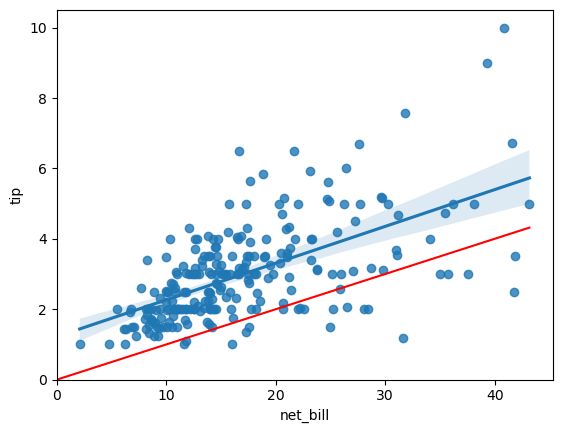

In [5]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x # 10% do valor da conta

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

In [6]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           5.02e-23
Time:                        14:32:45   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# b. Reproduza também o gráfico de dispersão dessas duas variáveis.

model = smf.ols('tip ~ net_bill', data=tips)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           5.02e-23
Time:                        14:36:57   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

<AxesSubplot:xlabel='net_bill', ylabel='tip'>

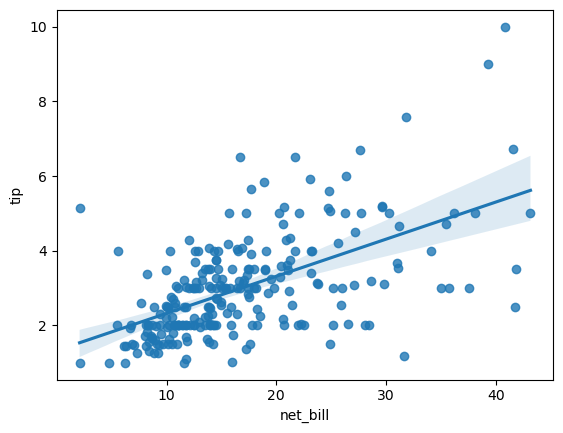

In [9]:
# b. Reproduza também o gráfico de dispersão dessas duas variáveis.

sns.regplot(x='net_bill', y='tip', data=tips)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           1.52e-06
Time:                        14:42:54   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

<AxesSubplot:xlabel='net_bill', ylabel='tip_pct'>

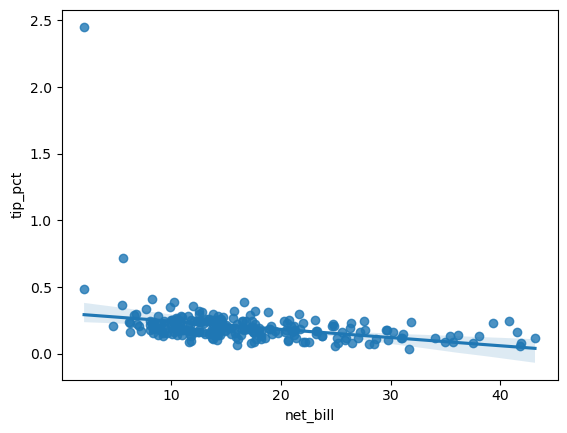

In [11]:
model = smf.ols('tip_pct ~ net_bill', data=tips)
results = model.fit()
print(results.summary())

sns.regplot(x='net_bill', y='tip_pct', data=tips)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [ ]:
"""
O primeiro gráfico de dispersão mostra a relação entre a gorjeta (tip) e o valor da conta líquida (sem a gorjeta) (net_bill),
enquanto o segundo mostra a relação entre a porcentagem da gorjeta (tip_pct) e o valor da conta líquida (net_bill).
Ambos os gráficos mostram uma relação positiva entre as duas variáveis, o que sugere que quanto maior o valor da conta, 
maior a gorjeta (em termos absolutos ou em porcentagem).

No entanto, a regressão do segundo gráfico é diferente da regressão do primeiro gráfico, já que estamos ajustando a relação
entre duas variáveis diferentes. Comparar diretamente os valores de R-quadrado não seria apropriado, pois o R-quadrado mede 
a proporção da variação total da variável dependente explicada pelo modelo, e não a relação entre duas variáveis diferentes.

Em resumo, ambos os gráficos mostram uma relação positiva entre o valor da conta líquida e a gorjeta, 
mas a forma específica dessa relação é diferente entre os dois gráficos devido às variáveis que estão sendo consideradas.

"""

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [14]:
# Obter o valor predito para tip_pct
pred = results.fittedvalues

# Obter o valor predito para tip
tips['tip_pred'] = pred * tips['net_bill']

# Calcular o R-quadrado para tip
r_squared_tip = np.corrcoef(tips['tip'], tips['tip_pred'])[0, 1]**2

# Imprimir R-quadrado para tip
print('R-quadrado para tip:', r_squared_tip)

R-quadrado para tip: 0.12112385704528675
